In [65]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/CLEAN__FITPULSE__DATA__.csv")

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Rename 'Id' column to 'user_id' to prevent KeyErrors
df = df.rename(columns={'Id': 'user_id'})

# Verify column names
print(df.columns)

# Convert timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Sort values
df = df.sort_values('timestamp')

df.head()

Index(['timestamp', 'heart_rate', 'resting_heart_rate', 'daily_steps',
       'hours_sleep', 'stress_level', 'anomaly_label', 'id'],
      dtype='object')


,timestamp,heart_rate,resting_heart_rate,daily_steps,hours_sleep,stress_level,anomaly_label,id
0,2024-01-01 00:00:00,74,55,6751,7.06,2.9,0,1
1,2024-01-01 00:01:00,71,58,5587,6.79,4.0,0,1
2,2024-01-01 00:02:00,75,60,6077,7.06,2.5,0,1
3,2024-01-01 00:03:00,80,60,5630,7.27,2.4,0,1
4,2024-01-01 00:04:00,71,59,5652,7.02,2.7,0,1


In [66]:
df['timestamp'] = pd.to_datetime(df['timestamp']).dt.tz_localize(None)


In [67]:
df.tail()

,timestamp,heart_rate,resting_heart_rate,daily_steps,hours_sleep,stress_level,anomaly_label,id
395,2024-01-01 06:35:00,70,63,6352,6.50,3.7,0,5
396,2024-01-01 06:36:00,63,60,5984,7.31,3.0,0,5
397,2024-01-01 06:37:00,79,62,6442,8.03,2.4,0,5
398,2024-01-01 06:38:00,71,60,6179,7.01,2.9,0,5
399,2024-01-01 06:39:00,78,60,7091,6.64,2.5,0,5


In [68]:
!pip install tsfresh


In [69]:
from tsfresh import extract_features

tsfresh_df = df[['id', 'timestamp', 'heart_rate', 'daily_steps', 'hours_sleep']]

In [70]:
extracted_features = extract_features(
    tsfresh_df,
    column_id="id",
    column_sort="timestamp"
)

extracted_features.head()

Feature Extraction: 100%|██████████| 15/15 [00:03<00:00,  4.54it/s]


,heart_rate__variance_larger_than_standard_deviation,heart_rate__has_duplicate_max,heart_rate__has_duplicate_min,heart_rate__has_duplicate,heart_rate__sum_values,heart_rate__abs_energy,heart_rate__mean_abs_change,heart_rate__mean_change,heart_rate__mean_second_derivative_central,heart_rate__median,...,hours_sleep__fourier_entropy__bins_5,hours_sleep__fourier_entropy__bins_10,hours_sleep__fourier_entropy__bins_100,hours_sleep__permutation_entropy__dimension_3__tau_1,hours_sleep__permutation_entropy__dimension_4__tau_1,hours_sleep__permutation_entropy__dimension_5__tau_1,hours_sleep__permutation_entropy__dimension_6__tau_1,hours_sleep__permutation_entropy__dimension_7__tau_1,hours_sleep__query_similarity_count__query_None__threshold_0.0,hours_sleep__mean_n_absolute_max__number_of_maxima_7
1,1.0,0.0,0.0,1.0,6575.0,481687.0,6.888889,-0.022222,0.000000,71.0,...,1.296084,1.935314,3.359721,1.773386,3.048200,4.069345,4.373749,4.442651,NaN,8.025714
2,1.0,0.0,0.0,1.0,5896.0,425758.0,5.716049,-0.061728,0.081250,72.0,...,1.365962,1.989463,3.304211,1.750766,2.954448,3.974415,4.271790,4.312493,NaN,7.791429
3,1.0,0.0,0.0,1.0,5434.0,395632.0,5.662162,-0.067568,0.000000,73.0,...,1.090242,1.576836,2.962323,1.765255,2.992418,3.857435,4.109866,4.193924,NaN,7.955714
4,1.0,1.0,0.0,1.0,4701.0,341641.0,6.140625,-0.078125,0.047619,73.0,...,1.432931,2.061824,3.370481,1.787590,3.094081,3.906339,4.094345,4.077537,NaN,8.021429
5,1.0,1.0,0.0,1.0,6267.0,454403.0,5.627907,0.023256,0.023529,72.0,...,1.080896,1.718962,3.199435,1.750800,3.035176,4.049179,4.349620,4.394449,NaN,7.878571


In [71]:
from scipy.stats import skew, kurtosis

stats_features = df.groupby('id').agg(
    hr_mean=('heart_rate', 'mean'),
    hr_std=('heart_rate', 'std'),
    hr_skew=('heart_rate', skew),
    hr_kurtosis=('heart_rate', kurtosis),

    steps_mean=('daily_steps', 'mean'),
    steps_std=('daily_steps', 'std'),

    sleep_mean=('hours_sleep', 'mean')
)

stats_features.head()

,hr_mean,hr_std,hr_skew,hr_kurtosis,steps_mean,steps_std,sleep_mean
id,,,,,,,
1,72.252747,8.579813,5.389984,40.944826,6155.780220,761.027519,7.000330
2,71.902439,4.741750,0.310047,-0.302783,6146.317073,732.252838,6.913902
3,72.453333,5.094494,0.733515,1.728908,6219.160000,1594.368027,7.113067
4,72.323077,5.077855,-0.348850,0.537448,6053.938462,827.181092,7.119538
5,72.034483,5.869607,-2.060027,11.363168,6081.356322,860.602560,6.943563


In [72]:
final_features = extracted_features.join(stats_features)
final_features.head()


,heart_rate__variance_larger_than_standard_deviation,heart_rate__has_duplicate_max,heart_rate__has_duplicate_min,heart_rate__has_duplicate,heart_rate__sum_values,heart_rate__abs_energy,heart_rate__mean_abs_change,heart_rate__mean_change,heart_rate__mean_second_derivative_central,heart_rate__median,...,hours_sleep__permutation_entropy__dimension_7__tau_1,hours_sleep__query_similarity_count__query_None__threshold_0.0,hours_sleep__mean_n_absolute_max__number_of_maxima_7,hr_mean,hr_std,hr_skew,hr_kurtosis,steps_mean,steps_std,sleep_mean
1,1.0,0.0,0.0,1.0,6575.0,481687.0,6.888889,-0.022222,0.000000,71.0,...,4.442651,NaN,8.025714,72.252747,8.579813,5.389984,40.944826,6155.780220,761.027519,7.000330
2,1.0,0.0,0.0,1.0,5896.0,425758.0,5.716049,-0.061728,0.081250,72.0,...,4.312493,NaN,7.791429,71.902439,4.741750,0.310047,-0.302783,6146.317073,732.252838,6.913902
3,1.0,0.0,0.0,1.0,5434.0,395632.0,5.662162,-0.067568,0.000000,73.0,...,4.193924,NaN,7.955714,72.453333,5.094494,0.733515,1.728908,6219.160000,1594.368027,7.113067
4,1.0,1.0,0.0,1.0,4701.0,341641.0,6.140625,-0.078125,0.047619,73.0,...,4.077537,NaN,8.021429,72.323077,5.077855,-0.348850,0.537448,6053.938462,827.181092,7.119538
5,1.0,1.0,0.0,1.0,6267.0,454403.0,5.627907,0.023256,0.023529,72.0,...,4.394449,NaN,7.878571,72.034483,5.869607,-2.060027,11.363168,6081.356322,860.602560,6.943563


In [73]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)
selected_features = selector.fit_transform(final_features.fillna(0))

selected_features.shape


(5, 1216)

In [74]:
import pandas as pd
import numpy as np

features = final_features.fillna(0)
features.head()


,heart_rate__variance_larger_than_standard_deviation,heart_rate__has_duplicate_max,heart_rate__has_duplicate_min,heart_rate__has_duplicate,heart_rate__sum_values,heart_rate__abs_energy,heart_rate__mean_abs_change,heart_rate__mean_change,heart_rate__mean_second_derivative_central,heart_rate__median,...,hours_sleep__permutation_entropy__dimension_7__tau_1,hours_sleep__query_similarity_count__query_None__threshold_0.0,hours_sleep__mean_n_absolute_max__number_of_maxima_7,hr_mean,hr_std,hr_skew,hr_kurtosis,steps_mean,steps_std,sleep_mean
1,1.0,0.0,0.0,1.0,6575.0,481687.0,6.888889,-0.022222,0.000000,71.0,...,4.442651,0.0,8.025714,72.252747,8.579813,5.389984,40.944826,6155.780220,761.027519,7.000330
2,1.0,0.0,0.0,1.0,5896.0,425758.0,5.716049,-0.061728,0.081250,72.0,...,4.312493,0.0,7.791429,71.902439,4.741750,0.310047,-0.302783,6146.317073,732.252838,6.913902
3,1.0,0.0,0.0,1.0,5434.0,395632.0,5.662162,-0.067568,0.000000,73.0,...,4.193924,0.0,7.955714,72.453333,5.094494,0.733515,1.728908,6219.160000,1594.368027,7.113067
4,1.0,1.0,0.0,1.0,4701.0,341641.0,6.140625,-0.078125,0.047619,73.0,...,4.077537,0.0,8.021429,72.323077,5.077855,-0.348850,0.537448,6053.938462,827.181092,7.119538
5,1.0,1.0,0.0,1.0,6267.0,454403.0,5.627907,0.023256,0.023529,72.0,...,4.394449,0.0,7.878571,72.034483,5.869607,-2.060027,11.363168,6081.356322,860.602560,6.943563


In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [76]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)


In [77]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_features)


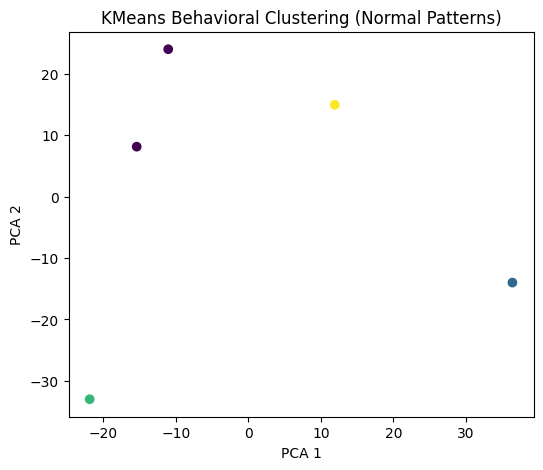

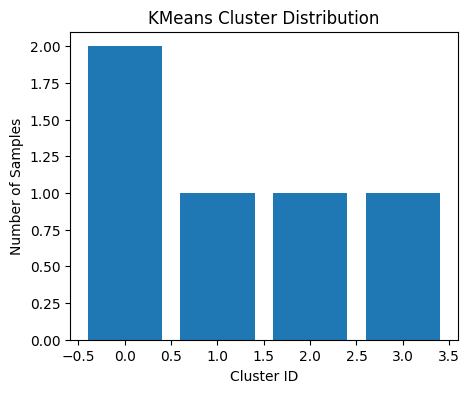

In [78]:
import matplotlib.pyplot as plt

# PCA Scatter
plt.figure(figsize=(6,5))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=kmeans_labels)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("KMeans Behavioral Clustering (Normal Patterns)")
plt.show()

# Cluster distribution
unique, counts = np.unique(kmeans_labels, return_counts=True)

plt.figure(figsize=(5,4))
plt.bar(unique, counts)
plt.xlabel("Cluster ID")
plt.ylabel("Number of Samples")
plt.title("KMeans Cluster Distribution")
plt.show()



In [79]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=3)
dbscan_labels = dbscan.fit_predict(pca_features)


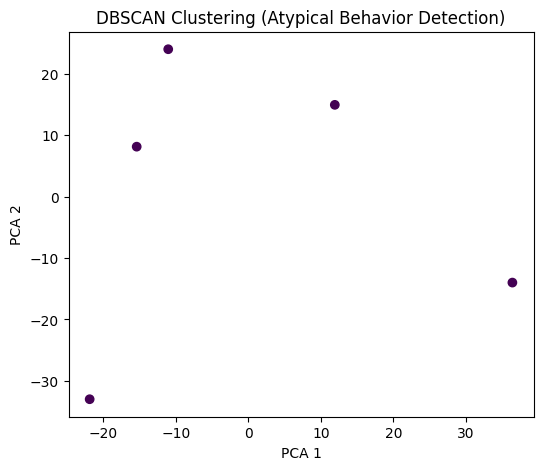

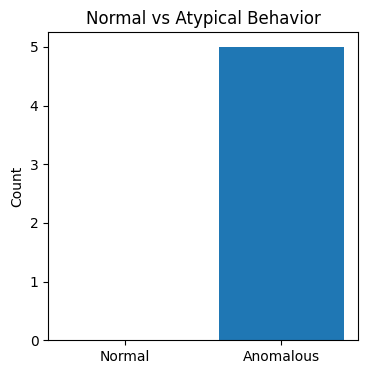

In [80]:
# PCA Scatter with anomalies
plt.figure(figsize=(6,5))
plt.scatter(
    pca_features[:, 0],
    pca_features[:, 1],
    c=dbscan_labels
)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("DBSCAN Clustering (Atypical Behavior Detection)")
plt.show()

# Anomaly count
anomalies = np.sum(dbscan_labels == -1)

plt.figure(figsize=(4,4))
plt.bar(["Normal", "Anomalous"], [len(dbscan_labels)-anomalies, anomalies])
plt.title("Normal vs Atypical Behavior")
plt.ylabel("Count")
plt.show()

In [81]:
np.unique(dbscan_labels, return_counts=True)


(array([-1]), array([5]))

In [82]:
!pip install prophet


In [83]:
hourly_data = df.resample('H', on='timestamp').mean(numeric_only=True).reset_index()
hourly_data.head()

/tmp/ipython-input-2789744369.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = df.resample('H', on='timestamp').mean(numeric_only=True).reset_index()


,timestamp,heart_rate,resting_heart_rate,daily_steps,hours_sleep,stress_level,anomaly_label,id
0,2024-01-01 00:00:00,72.333333,59.700000,6080.300000,7.016833,3.155000,0.016667,1.000000
1,2024-01-01 01:00:00,71.966667,59.933333,6306.900000,7.020833,3.075000,0.000000,1.483333
2,2024-01-01 02:00:00,72.400000,59.483333,5959.850000,6.855667,3.088333,0.016667,2.116667
3,2024-01-01 03:00:00,72.300000,60.300000,6147.550000,7.126500,2.873333,0.000000,3.000000
4,2024-01-01 04:00:00,71.933333,59.850000,6249.166667,7.134500,3.010000,0.016667,3.866667


In [84]:
from prophet import Prophet

hr_df = hourly_data[['timestamp', 'heart_rate']]
hr_df.columns = ['ds', 'y']

In [85]:
import pandas as pd
from prophet import Prophet

if pd.api.types.is_datetime64_any_dtype(hr_df['ds']):
    if hr_df['ds'].dt.tz is not None:
        hr_df['ds'] = hr_df['ds'].dt.tz_localize(None)

if hr_df['y'].isnull().sum() >= len(hr_df) - 1:
    hr_df_cleaned = hr_df.dropna(subset=['y']).copy()
    if len(hr_df_cleaned) < 2:
        raise ValueError("Dataframe has less than 2 non-NaN rows in 'y' after cleanup. Prophet cannot fit.")
    hr_model = Prophet()
    hr_model.fit(hr_df_cleaned)
else:
    hr_model = Prophet()
    hr_model.fit(hr_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 4.


In [86]:
hr_future = hr_model.make_future_dataframe(periods=7)
hr_forecast = hr_model.predict(hr_future)


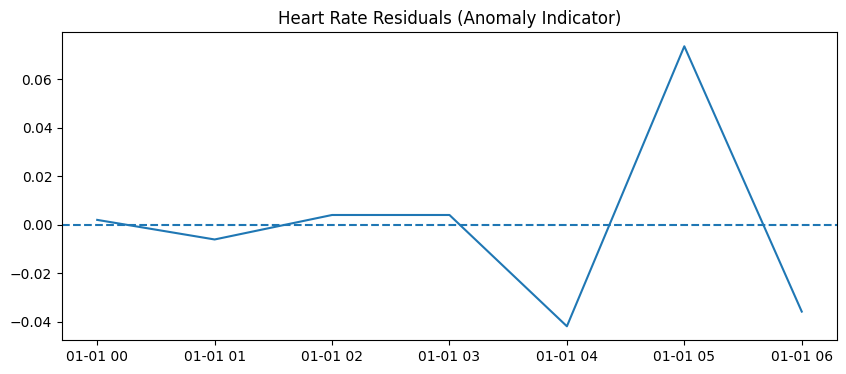

In [87]:
hr_results = hr_df.copy()
hr_results['yhat'] = hr_forecast['yhat'].iloc[:len(hr_df)]
hr_results['residual'] = hr_results['y'] - hr_results['yhat']

plt.figure(figsize=(10,4))
plt.plot(hr_results['ds'], hr_results['residual'])
plt.axhline(0, linestyle='--')
plt.title("Heart Rate Residuals (Anomaly Indicator)")
plt.show()

In [88]:
steps_df = hourly_data[['timestamp', 'daily_steps']]
steps_df.columns = ['ds', 'y']

In [89]:
steps_model = Prophet()
steps_model.fit(steps_df)

steps_future = steps_model.make_future_dataframe(periods=7)
steps_forecast = steps_model.predict(steps_future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 4.


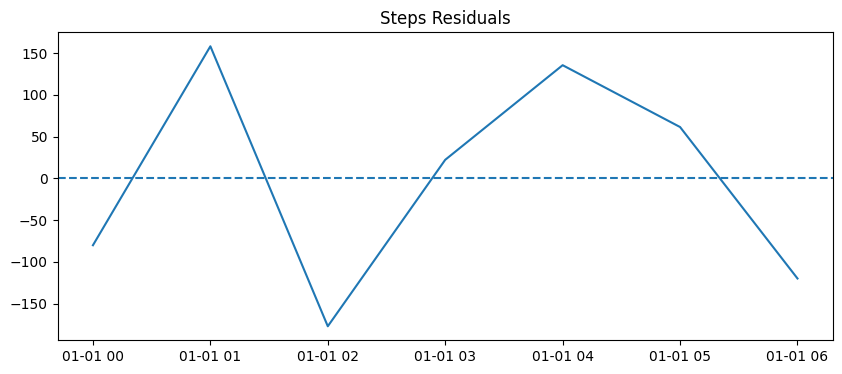

In [90]:
steps_results = steps_df.copy()
steps_results['yhat'] = steps_forecast['yhat'].iloc[:len(steps_df)] # Ensure same length
steps_results['residual'] = steps_results['y'] - steps_results['yhat']

plt.figure(figsize=(10,4))
plt.plot(steps_results['ds'], steps_results['residual'])
plt.axhline(0, linestyle='--')
plt.title("Steps Residuals")
plt.show()

In [91]:
sleep_df = hourly_data[['timestamp', 'hours_sleep']]
sleep_df.columns = ['ds', 'y']

In [92]:
sleep_model = Prophet()
sleep_model.fit(sleep_df)

sleep_future = sleep_model.make_future_dataframe(periods=7)
sleep_forecast = sleep_model.predict(sleep_future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 4.


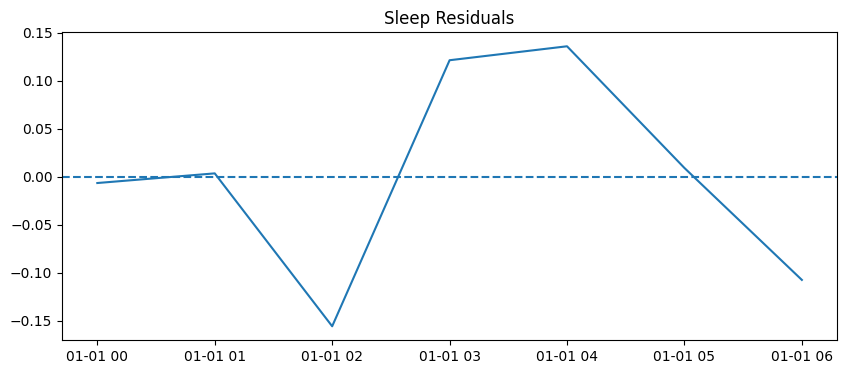

In [93]:
sleep_results = sleep_df.copy()
sleep_results['yhat'] = sleep_forecast['yhat'].iloc[:len(sleep_df)]
sleep_results['residual'] = sleep_results['y'] - sleep_results['yhat']

plt.figure(figsize=(10,4))
plt.plot(sleep_results['ds'], sleep_results['residual'])
plt.axhline(0, linestyle='--')
plt.title("Sleep Residuals")
plt.show()